In [1]:
import numpy as np
import pandas as pd
import re,string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
# from sklearn.ensemble import RandomForestClassifier
# !pip install nltk
import nltk
import pickle
nltk.download('stopwords')
nltk.download('wordnet')
%matplotlib inline

[nltk_data] Downloading package stopwords to /home/kali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/kali/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('bbc-text.csv', encoding = 'latin1')
df = df.sample(frac = 1)
df

,category,text
27,tech,mobile gig aims to rock 3g forget about going ...
95,sport,dent continues adelaide progress american tayl...
1026,sport,newcastle 27-27 gloucester newcastle centre ma...
1597,business,survey confirms property slowdown government f...
914,business,us economy shows solid gdp growth the us econo...
...,...,...
1909,sport,sculthorpe wants lions captaincy paul sculthor...
1127,entertainment,my memories of marley... to mark the 60th ann...
602,business,pension hitch for long-living men male life ex...
1616,sport,ferguson urges henry punishment sir alex fergu...


In [3]:
#No of a categories
set(df['category']) # set() fetch the unique data only
# df['category']

{'business', 'entertainment', 'politics', 'sport', 'tech'}

In [4]:
#No of a categories
len(set(df['category']))
# df['category']

5

In [5]:
df.groupby('category').category.count()

category
business         510
entertainment    386
politics         417
sport            511
tech             401
Name: category, dtype: int64

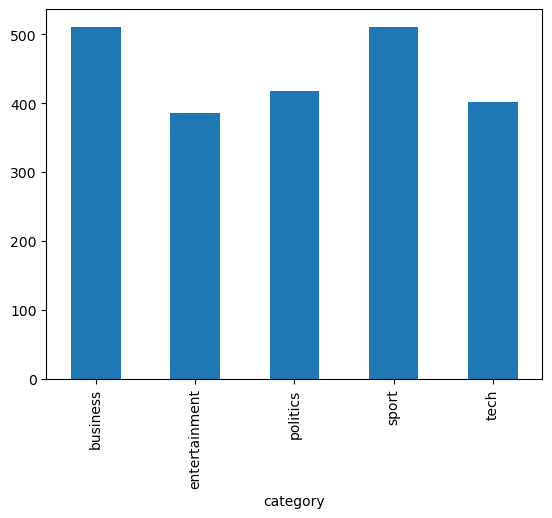

In [6]:
#Analyzing data
df.groupby('category').category.count().plot.bar()
plt.show()

In [7]:
#Data Preprocessing

In [8]:
# df['text'] = [re.sub("[^a-zA-Z]", " ", i).lower() for i in df['text']]

In [9]:
#stop words
nltk.download('stopwords')
stop_word = stopwords.words("english")
print(stop_word)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /home/kali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
#stop words
nltk.download('stopwords')
nepali_words = stopwords.words("nepali")
print(nepali_words)

['छ', 'र', 'पनि', 'छन्', 'लागि', 'भएको', 'गरेको', 'भने', 'गर्न', 'गर्ने', 'हो', 'तथा', 'यो', 'रहेको', 'उनले', 'थियो', 'हुने', 'गरेका', 'थिए', 'गर्दै', 'तर', 'नै', 'को', 'मा', 'हुन्', 'भन्ने', 'हुन', 'गरी', 'त', 'हुन्छ', 'अब', 'के', 'रहेका', 'गरेर', 'छैन', 'दिए', 'भए', 'यस', 'ले', 'गर्नु', 'औं', 'सो', 'त्यो', 'कि', 'जुन', 'यी', 'का', 'गरि', 'ती', 'न', 'छु', 'छौं', 'लाई', 'नि', 'उप', 'अक्सर', 'आदि', 'कसरी', 'क्रमशः', 'चाले', 'अगाडी', 'अझै', 'अनुसार', 'अन्तर्गत', 'अन्य', 'अन्यत्र', 'अन्यथा', 'अरु', 'अरुलाई', 'अर्को', 'अर्थात', 'अर्थात्', 'अलग', 'आए', 'आजको', 'ओठ', 'आत्म', 'आफू', 'आफूलाई', 'आफ्नै', 'आफ्नो', 'आयो', 'उदाहरण', 'उनको', 'उहालाई', 'एउटै', 'एक', 'एकदम', 'कतै', 'कम से कम', 'कसै', 'कसैले', 'कहाँबाट', 'कहिलेकाहीं', 'का', 'किन', 'किनभने', 'कुनै', 'कुरा', 'कृपया', 'केही', 'कोही', 'गए', 'गरौं', 'गर्छ', 'गर्छु', 'गर्नुपर्छ', 'गयौ', 'गैर', 'चार', 'चाहनुहुन्छ', 'चाहन्छु', 'चाहिए', 'छू', 'जताततै', 'जब', 'जबकि', 'जसको', 'जसबाट', 'जसमा', 'जसलाई', 'जसले', 'जस्तै', 'जस्तो', 'जस्तोसुकै', 'जहाँ'

[nltk_data] Downloading package stopwords to /home/kali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# Data Cleaning using stemmer

stemmer = PorterStemmer()# finding root word only i.e loving root word only love, computing root word comput only.
data = "I am loving computing".split() # split() convert data into list
print(data)

['I', 'am', 'loving', 'computing']


In [12]:
# Data Cleaning using stemmer

stemmer = PorterStemmer()# finding root word only i.e loving root word only love, computing root word comput only.
data = "I am loving computing".split() 
" ".join([stemmer.stem(i) for i in data])

'i am love comput'

In [13]:
# Data Cleaning using stemmer

stemmer = PorterStemmer()# finding root word only i.e loving root word only love, computing root word comput only.
data = "I am loving computing".split() 
([stemmer.stem(i) for i in data])
# print(stemmer.stem(i))
# print(i)

['i', 'am', 'love', 'comput']

In [14]:
# Data Cleaning using stemmer

stemmer = PorterStemmer()# finding root word only i.e loving root word only love, computing root word comput only.
data = "I am loving computing".split()
" ".join([stemmer.stem(i) for i in data])

'i am love comput'

In [15]:
# Data Cleaning using stemmer

stemmer = PorterStemmer()# finding root word only i.e loving root word only love, computing root word comput only.
data = "I am loving computing".split()
" ".join([stemmer.stem(i) for i in data])
# stemmer.stem("")

'i am love comput'

In [16]:
# Data Cleaning using stemmer

stemmer = PorterStemmer()# finding root word only i.e loving root word only love, computing root word comput only.
data = "I am loving computing".split()
" ".join([stemmer.stem(i) for i in data])
# stemmer.stem("")

'i am love comput'

In [17]:
data = "I am Loving Computing".split()
" ".join([stemmer.stem(i) for i in data])
# stemmer.stem("I am loving computing")

'i am love comput'

In [18]:
# Data Cleaning removing stopwords

In [19]:
# Create an empty string for the filtered news
news = ''

# Create a stemmer
stemmer = PorterStemmer()

# Split the input data into words
data = "I am Loving Computing".split()

# Iterate through each word in data
for word in data:
    # Convert the word to lowercase for case-insensitive comparison
    if stemmer.stem(word.lower()) not in stop_word:
        # If the lowercase version of the word is not in the list, add it to news
        news += stemmer.stem(word.lower()) + " " 
#         news += " " + word # this is also correct
news

'love comput '

In [33]:
df['text']

27      mobile gig aims rock g forget going crowded ba...
95      dent continues adelaide progress american tayl...
1026    newcastle gloucester newcastle centre mathew t...
1597    survey confirms property slowdown government f...
914     us economy shows solid gdp growth us economy g...
                              ...                        
1909    sculthorpe wants lions captaincy paul sculthor...
1127    memories marley mark th anniversary birth regg...
602     pension hitch long living men male life expect...
1616    ferguson urges henry punishment sir alex fergu...
2011    fiat mulls ferrari market listing ferrari coul...
Name: text, Length: 2225, dtype: object

In [25]:
df['text'][0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

## need to remember this below code templete

=> df['text'] = list(map(lambda x: " ".join([i for i in x.lower().split() if i not in stopwords]), df['text']))

lambda x: ...: This defines an anonymous (lambda) function that takes an argument x.

x.lower().split(): For each value of x, this converts the text to lowercase and then splits it into a list of words. It is assuming that x is a string containing words.

[i for i in x.lower().split() if i not in stopwords]: This is a list comprehension that iterates over each word (i) in the list created by x.lower().split() and includes only those words that are not in the stopwords list. Stopwords are common words (e.g., "the", "and", "is") that are often removed in text processing because they don't contribute much to the meaning.

" ".join(...): This joins the list of filtered words back into a string, with space as the separator. So, it reconstructs the cleaned text without the stopwords.

list(map(..., df['text'])): This applies the lambda function to each element (x) in the 'text' column of the DataFrame (df). The result is a list of processed text strings.

df['text'] = ...: This assigns the list of processed text strings back to the 'text' column in the DataFrame, effectively replacing the original 'text' column with the cleaned text.



lambda arguments: expression

add = lambda x, y: x + y
result = add(3, 4)
print(result)




 Doing all cleaning process using regex, stemmer, stopwords for all data
 re.sub("[^a-zA-Z]", " ", i) # letters from a-z and A-Z will remain and other will be replace by space. 
 The map() function applies the specified function to each element of the iterable, and the result is an iterable 
map object.

 # example of map() function 
 Define a function that squares a number
 def square(x):
     return x ** 2
 Create a list of numbers
 numbers = [1, 2, 3, 4, 5]
 Use map to apply the square function to each element in the list
 squared_numbers = map(square, numbers)
 Convert the map object to a list to see the results
 result_list = list(squared_numbers)
 print(result_list)


In [26]:
# Doing all cleaning process using regex, stemmer, stopwords for all data
df['text'] = [re.sub("[^a-zA-Z]", " ", i).lower() for i in df['text']]
df['text'] = list(map(lambda x: " ".join([i for i in x.lower().split() if i not in stop_word]), df['text']))
# df['text'] = [" ".join(word.split() for word in df['text'] if word.lower() not in stopwords.words('english'))]
df

,category,text
27,tech,mobile gig aims rock g forget going crowded ba...
95,sport,dent continues adelaide progress american tayl...
1026,sport,newcastle gloucester newcastle centre mathew t...
1597,business,survey confirms property slowdown government f...
914,business,us economy shows solid gdp growth us economy g...
...,...,...
1909,sport,sculthorpe wants lions captaincy paul sculthor...
1127,entertainment,memories marley mark th anniversary birth regg...
602,business,pension hitch long living men male life expect...
1616,sport,ferguson urges henry punishment sir alex fergu...


In [27]:
df.to_csv('cleaned_bbc_data.csv')

In [28]:
pwd

'/media/sf_New_Volume_D/DataScience/Machine_Learning_Data_Science_Project/Broadway'

In [29]:
# df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() ]).lower())
# df

In [30]:
# print(stop_word)

In [31]:
# words = stopwords.words("nepali")
# words

In [32]:
# df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
# df

In [34]:
# Training model
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer()
X = df['text']
Y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15) #Splitting dataset

# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=2000)),
                     ('clf', LogisticRegression(random_state=1))])


# #Training model
model = pipeline.fit(X_train, y_train)

# #Creating pickle file
# with open('LogisticRegression.pickle', 'wb') as f:
#     pickle.dump(model, f)

In [35]:
X_test

661     vibe awards back despite violence us vibe awar...
1981    minister hits yukos sale russia renationalisat...
1369    anelka eyes man city departure striker nicolas...
880     roundabout continues nostalgia trip new big sc...
1012    galloway targets new labour mp george galloway...
                              ...                        
1617    uganda bans vagina monologues uganda authoriti...
1420    hoffman hits modern film hollywood legend dust...
2143    camera phones must haves four times mobiles ca...
1352    india russia energy talks india russia work to...
877     nintendo handheld given euro date nintendo new...
Name: text, Length: 334, dtype: object

In [36]:
y_test

661     entertainment
1981         business
1369            sport
880     entertainment
1012         politics
            ...      
1617    entertainment
1420    entertainment
2143             tech
1352         business
877              tech
Name: category, Length: 334, dtype: object

In [40]:
#Accuracy
from sklearn.metrics import accuracy_score
predict_news_cat = model.predict(X_test)
print(accuracy_score(y_test,predict_news_cat))
# print('\n')
# print(predict_news_cat)

0.9730538922155688


In [47]:
# file = open('/content/news.txt','r')
# news = file.read()
# file.close()

news = input("Enter news = ")
news_data = {'predict_news':[news]}
news_data_df = pd.DataFrame(news_data)
# news_data_df
predict_news_cat = model.predict(news_data_df['predict_news'])
print("Predicted news category = ",predict_news_cat[0])

Enter news = Policy Changes Aimed at Promoting Social Equity and Inclusion
Predicted news category =  business


In [49]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_test)
print(classification_report(model.predict(X_test),ytest))
print(confusion_matrix(model.predict(X_test),ytest))

               precision    recall  f1-score   support

     business       0.95      0.96      0.96        78
entertainment       0.95      1.00      0.97        53
     politics       0.97      0.93      0.95        60
        sport       1.00      0.99      0.99        78
         tech       1.00      0.98      0.99        65

     accuracy                           0.97       334
    macro avg       0.97      0.97      0.97       334
 weighted avg       0.97      0.97      0.97       334

[[75  1  2  0  0]
 [ 0 53  0  0  0]
 [ 2  2 56  0  0]
 [ 1  0  0 77  0]
 [ 1  0  0  0 64]]


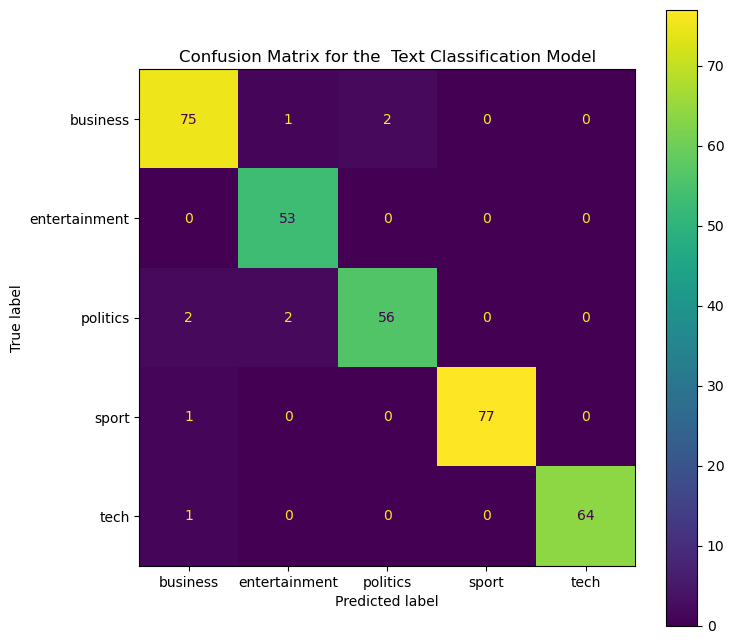

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(model.predict(X_test),ytest)
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['business','entertainment','politics','sport','tech']
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the  Text Classification Model')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);

In [64]:
# #stop words
# nltk.download('stopwords')
# words = stopwords.words("russian")
# print(words)